# Classifying Yelp Reviews 

In this project we aim to classify Yelp reviews into 1-star or 5-stars category based on the words used in the reviews.

We are using the <a href="https://www.kaggle.com/c/yelp-recsys-2013">Yelp Review Dataset</a> from Kaggle.

Each sample is a review by a user for a business and contains the text and the votes from other users about whether the review is "cool," "useful," or "funny."

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# The Data

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


We see that there are 10000 samples in the dataset.

In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
yelp['text_length'] = yelp['text'].apply(len)

Here we created a new column called "text_length" and input the length of each text.

In [7]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# Exploratory Data Analysis

## Histograms

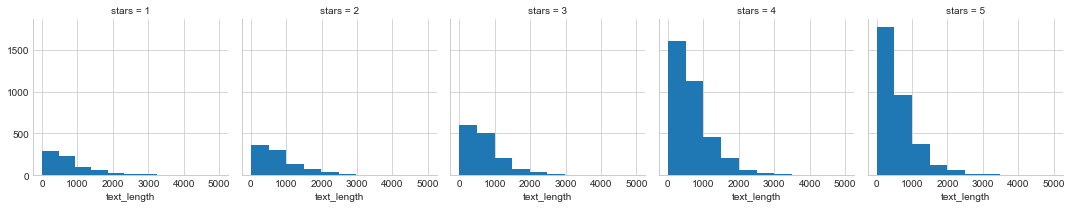

In [8]:
sns.set_style('whitegrid')
g = sns.FacetGrid(yelp, col='stars')
g = g.map(plt.hist, 'text_length')

We see that the majority of user leave less than 1000 words for review. Also, we see that the majority of users give 4-stars and 5-stars reviews.

## Boxplots

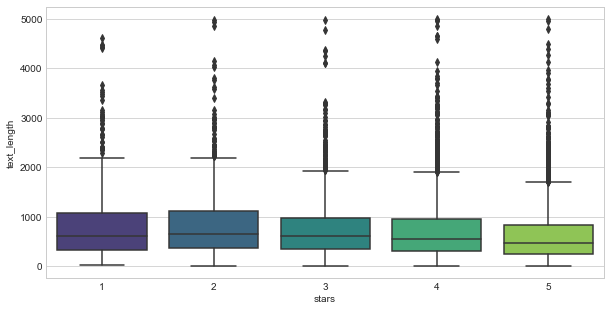

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=yelp, x='stars', y='text_length', palette='viridis')

We find out that the average text length of each star review is around 500-600 words.

## Countplot

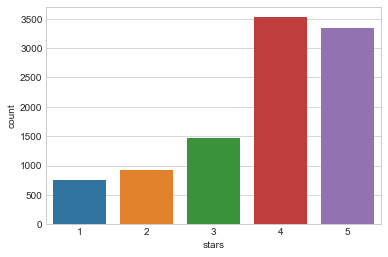

In [10]:
sns.countplot(data=yelp, x='stars')

There are about 3500 4-star reviews, 3300 5-star reviews, 1500 3-star reviews, 1000 2-star reviews, and finally about 700 1-star reviews. Since the total number of reviews in the dataset is 10000, we can say that 4-star reviews make up 35% of all the reviews, 5-star reviews 33%, 3-star 15%, 2-star 10%, and 1-star reviews make up about 7%.

## Finding Correlation

In [11]:
import numpy as np

yelp_mean = yelp.groupby('stars').apply(np.mean)
yelp_mean = yelp_mean.drop('stars', axis=1)

In [12]:
yelp_mean

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [13]:
yelp_corr = yelp_mean.corr()
yelp_corr

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


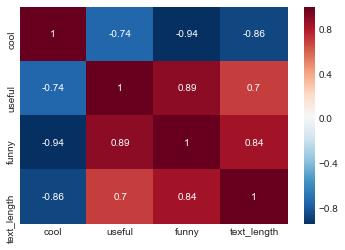

In [14]:
sns.heatmap(data=yelp_corr, annot=True, cmap='RdBu_r')

## NLP Classification

We are now going to perform natural language processing on the Yelp dataset. To simplify, we will use only the 1-star and 5-star reviews.

In [15]:
yelp_classes = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5) ]
yelp_classes.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [16]:
yelp_classes.shape

(4086, 11)

Considering the countplot above, 1-star reviews make up about 700 reviews, while 5-star 3300, which makes the number 4086 about the right amount.

Now we want to designate the features and target columns (X and y).

In [17]:
X = yelp_classes['text']
X.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object

In [18]:
y = yelp_classes['stars']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
countvectorizer = CountVectorizer(analyzer='word', stop_words='english').fit(X)

In [21]:
X = countvectorizer.transform(X)

In [22]:
print(X[5])

  (0, 1807)	1
  (0, 2540)	1
  (0, 2838)	1
  (0, 4199)	1
  (0, 5403)	1
  (0, 6357)	1
  (0, 9981)	1
  (0, 10591)	1
  (0, 11359)	1
  (0, 12781)	1
  (0, 15076)	1
  (0, 15928)	1
  (0, 16087)	1
  (0, 16593)	1
  (0, 17689)	1


## Train Test Split

In [23]:
from sklearn.cross_validation import train_test_split

/Users/kasherman/anaconda3/envs/datascience/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Using Multinomial Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb = MultinomialNB().fit(X_train, y_train)

In [27]:
nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
predictions = nb.predict(X_test)

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.83      0.71      0.76       228
          5       0.94      0.97      0.95       998

avg / total       0.92      0.92      0.92      1226



In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
print(confusion_matrix(y_test, predictions))

[[162  66]
 [ 34 964]]


Classification using Multinomial NB generates the 0.92 precision, 0.92 recall, and 0.92 f1-score.

## Classification using TF-IDF preprocessing

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english', lowercase=True)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

## Redoing Train Test Split

In [36]:
# This step is necessary because the previous train test data have been vectorized.
X = yelp_classes['text']
y = yelp_classes['stars']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        s...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

## Predictions and Evaluations

In [39]:
pred2 = pipeline.predict(X_test)

In [40]:
print(confusion_matrix(y_test, pred2))

[[  0 228]
 [  0 998]]


In [41]:
print(classification_report(y_test, pred2))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/kasherman/anaconda3/envs/datascience/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Turns out that TF-IDF does not improve the result. In fact, it makes it worse.

## Classification using Random Forest

We want to try using Pipeline with Random Forest as the classifier to see if the results can be improved. We will not include TF-IDF in the pipeline.

In [42]:
# Redo train test split

X = yelp_classes['text']
y = yelp_classes['stars']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
pipeline_rf = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),
    ('classifier', RandomForestClassifier())
])

In [46]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        s...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [47]:
pred_rf = pipeline_rf.predict(X_test)

In [48]:
print(confusion_matrix(y_test, pred_rf))

[[127 101]
 [ 34 964]]


In [49]:
print(classification_report(y_test, pred_rf))

             precision    recall  f1-score   support

          1       0.79      0.56      0.65       228
          5       0.91      0.97      0.93       998

avg / total       0.88      0.89      0.88      1226



Looks like Random Forest gives less recall value compared to MultinomialNB.

But what if we use different number of RF estimator(tree)?

## Random Forest with 15 estimators

In [50]:
X_train, X_test, y_train, y_test = train_test_split(yelp_classes['text'], yelp_classes['stars'], test_size=0.3, random_state=101)

In [51]:
pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),
    ('classifier', RandomForestClassifier(n_estimators=15))
])

In [52]:
pipeline3.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        s...imators=15, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [53]:
pred3 = pipeline3.predict(X_test)

In [54]:
print(classification_report(y_test,pred3))

             precision    recall  f1-score   support

          1       0.86      0.48      0.62       228
          5       0.89      0.98      0.94       998

avg / total       0.89      0.89      0.88      1226



Looks like RF with 15 estimators gives the same result as the previous RF.

What if we increase the number of estimators to 30?

## Random Forest with 30 estimators

In [55]:
X_train, X_test, y_train, y_test = train_test_split(yelp_classes['text'], yelp_classes['stars'], test_size=0.3, random_state=101)

In [56]:
pipeline4 = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),
    ('classifier', RandomForestClassifier(n_estimators=30))
])

In [57]:
pipeline4.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        s...imators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [58]:
pred4 = pipeline4.predict(X_test)

In [59]:
print(classification_report(y_test, pred4))

             precision    recall  f1-score   support

          1       0.84      0.49      0.62       228
          5       0.89      0.98      0.93       998

avg / total       0.88      0.89      0.88      1226



## Random Forest with 5 estimators

In [60]:
X_train, X_test, y_train, y_test = train_test_split(yelp_classes['text'], yelp_classes['stars'], test_size=0.3, random_state=101)

In [61]:
pipeline5 = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),
    ('classifier', RandomForestClassifier(n_estimators=5))
])

In [62]:
pipeline5.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        s...timators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [63]:
pred5 = pipeline5.predict(X_test)

In [64]:
print(classification_report(y_test, pred5))

             precision    recall  f1-score   support

          1       0.65      0.39      0.48       228
          5       0.87      0.95      0.91       998

avg / total       0.83      0.85      0.83      1226



So now after we specify the number of estimators, we see that RF with 5 estimators generates the worst results with 0.83 precision, 0.85 recall, 0.83 f1-score, and RF with 30 estimators generates a slightly better results with 0.88 precision, 0.89 recall, 0.88 f1-score, and RF with 15 estimators generates similar results with 0.89 precision, 0.89 recall, and 0.88 f1-score.

### It is useful to note that none of the RF results rival the Multinomial NB.